### Data loading and Preprocessing

In [35]:
#importing all necessary libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import StratifiedKFold
import pprint 
import warnings
from numpy.linalg import inv
warnings.filterwarnings('ignore')

In [36]:
#loading the file into pandas dataframe
def load_data(file_path):
    return pd.read_csv(file_path)

file_path = "DMT Dataset/wdbc.data"
data = load_data(file_path)


In [37]:
#Normalizing the values of all the columns except target and primary key
#to make sure that the attribute values are between 0 and 1 so that it'll
#be easier for the model to train
attr = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']

for i in attr:
    column_name = i
    column_data = data[column_name]
    min_val = column_data.min()
    max_val = column_data.max()
    normalized_column_data = (column_data - min_val) / (max_val - min_val)
    data[column_name] = normalized_column_data

print(data.head())


         ID Diagnosis   radius1  texture1  perimeter1     area1  smoothness1  \
0    842302         M  0.521037  0.022658    0.545989  0.363733     0.593753   
1    842517         M  0.643144  0.272574    0.615783  0.501591     0.289880   
2  84300903         M  0.601496  0.390260    0.595743  0.449417     0.514309   
3  84348301         M  0.210090  0.360839    0.233501  0.102906     0.811321   
4  84358402         M  0.629893  0.156578    0.630986  0.489290     0.430351   

   compactness1  concavity1  concave_points1  ...   radius3  texture3  \
0      0.792037    0.703140         0.731113  ...  0.620776  0.141525   
1      0.181768    0.203608         0.348757  ...  0.606901  0.303571   
2      0.431017    0.462512         0.635686  ...  0.556386  0.360075   
3      0.811361    0.565604         0.522863  ...  0.248310  0.385928   
4      0.347893    0.463918         0.518390  ...  0.519744  0.123934   

   perimeter3     area3  smoothness3  compactness3  concavity3  \
0    0.668310 

In [38]:
#Converting the categorical values into integers
mapping = {'B': 0, 'M': 1}
data['Diagnosis'] = data['Diagnosis'].map(mapping)

print(data.head())

         ID  Diagnosis   radius1  texture1  perimeter1     area1  smoothness1  \
0    842302          1  0.521037  0.022658    0.545989  0.363733     0.593753   
1    842517          1  0.643144  0.272574    0.615783  0.501591     0.289880   
2  84300903          1  0.601496  0.390260    0.595743  0.449417     0.514309   
3  84348301          1  0.210090  0.360839    0.233501  0.102906     0.811321   
4  84358402          1  0.629893  0.156578    0.630986  0.489290     0.430351   

   compactness1  concavity1  concave_points1  ...   radius3  texture3  \
0      0.792037    0.703140         0.731113  ...  0.620776  0.141525   
1      0.181768    0.203608         0.348757  ...  0.606901  0.303571   
2      0.431017    0.462512         0.635686  ...  0.556386  0.360075   
3      0.811361    0.565604         0.522863  ...  0.248310  0.385928   
4      0.347893    0.463918         0.518390  ...  0.519744  0.123934   

   perimeter3     area3  smoothness3  compactness3  concavity3  \
0    0.6

In [39]:
#Method to split the data into train and test sets that'll take the random state value and the test_size which will decide
#what percentage of the records are split into train and test
#The random state ensures that we will always split the same way when we use the random function
def train_test_split(X, y, random_state=41, test_size=0.2):
    n_samples = X.shape[0]
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(np.arange(n_samples))
    test_size = int(n_samples * test_size)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [40]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,842517,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,84300903,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,84348301,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,84358402,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [41]:
#dropping the ID column as this has no significance in classifying the attribute values
data.drop('ID', axis=1, inplace=True)

In [42]:
data.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [43]:
#Taking a look at the data trends and statistics for each attribute
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.0,0.000000,0.000000,1.000000,1.0
radius1,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
texture1,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter1,569.0,0.332935,0.167915,0.0,0.216847,0.293345,0.416765,1.0
area1,569.0,0.216920,0.149274,0.0,0.117413,0.172895,0.271135,1.0
smoothness1,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness1,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
concavity1,569.0,0.208058,0.186785,0.0,0.069260,0.144189,0.306232,1.0
concave_points1,569.0,0.243137,0.192857,0.0,0.100944,0.166501,0.367793,1.0
symmetry1,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0


In [44]:
#Fetching correlation data amongst the attributes
#We mainly need to focus on the target attribute correlation with rest of the columns
correlation_data = data.corr()
cor_target = abs(correlation_data["Diagnosis"])
relevant_features = cor_target[cor_target>0.05]
names = [index for index, value in relevant_features.items()]

print(names)

['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'radius2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


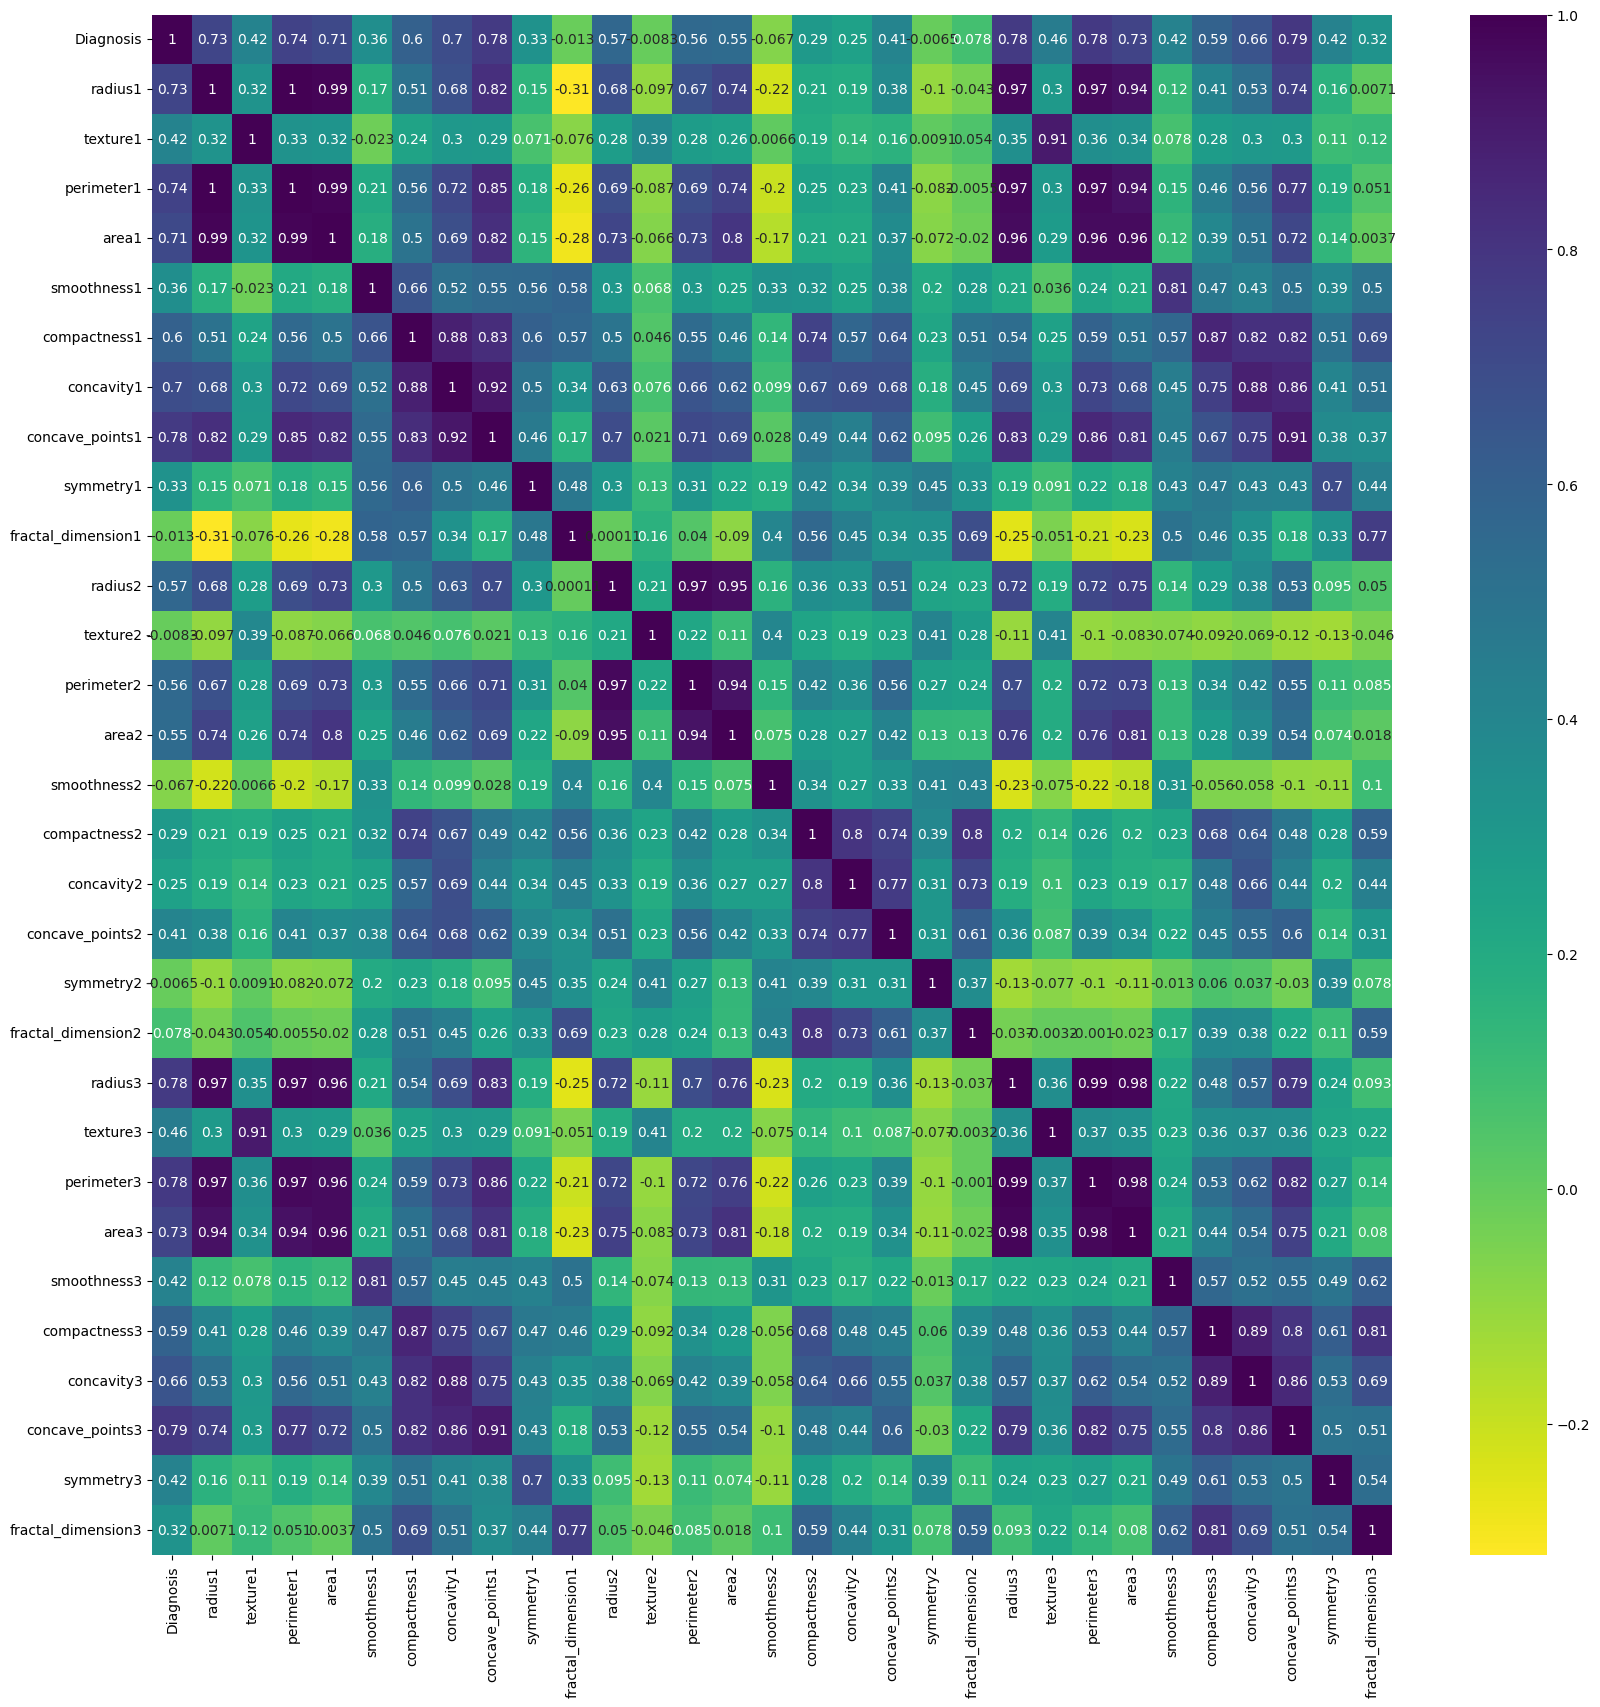

In [45]:
#Plotting the correlation matrix 
plt.figure(figsize=(20,20))
sns.heatmap(correlation_data, cmap='viridis_r',annot=True)
plt.show()

### Decision Tree Implementation

In [13]:
#Creating a node of tree for storing the feature at that node, the threshold that will decide if the value has to go 
#left or right of the tree, a left and right pointers that will store the structure of the tree
#along with information gain of the class and value which contains the target value if it is the leaf node
class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value
#Designing class for the Decision Tree that contains methods for initializing the variables, fitting and predicting
class DecisionTree():
    #Method when the class is called to initialize the variables
    def __init__(self, min_samples=2, max_depth=2):
        self.min_samples = min_samples
        self.max_depth = max_depth

    #This method will find the best split to check for a node what the left and right nodes can be by checking the information gain
    def find_split(self, dataset, num_samples, num_features):
        #default values for info_gain is -1 and other variables have None values
        split_values = {'info_gain':- 1, 'feature': None, 'threshold': None}
        #For every feature and for every threshold value keeping 0.1 step and taking values from 0 to 1
        #since we've already normalized the datavalues we calculate the left and right dataset and then 
        #from the target column data we calculate the info gain
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            thresholds = np.unique(feature_values)
            for threshold in thresholds:
                left_dataset = []
                right_dataset = []
                for row in dataset:
                    if row[feature_index] <= threshold:
                        left_dataset.append(row)
                    else:
                        right_dataset.append(row)
                left_dataset = np.array(left_dataset)
                right_dataset = np.array(right_dataset)
                #if both left and right dataset have values i.e., there are values which are greater and lesser than the 
                #threshold we need to check how good the split is
                if len(left_dataset) and len(right_dataset):
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    #To calculate the information gain we need to find the right and left dataset's entropy
                    entropy = 0
                    labels = np.unique(y)
                    #Checking the labels in parent node to calculate the parent entropy
                    for label in labels:
                        label_examples = y[y == label]
                        pl = len(label_examples) / len(y)
                        entropy += -pl * np.log2(pl)
                    parent_entropy = entropy
                    weight_left = len(left_y) / len(y)
                    weight_right= len(right_y) / len(y)
                    #Checking the labels in left node to calculate the left child entropy
                    entropy = 0
                    labels = np.unique(left_y)
                    for label in labels:
                        label_examples = left_y[left_y == label]
                        pl = len(label_examples) / len(left_y)
                        entropy += -pl * np.log2(pl)
                    entropy_left = entropy
                    #Checking the labels in right node to calculate the right child entropy
                    entropy = 0
                    labels = np.unique(right_y)
                    for label in labels:
                        label_examples = right_y[right_y == label]
                        pl = len(label_examples) / len(right_y)
                        entropy += -pl * np.log2(pl)
                    entropy_right = entropy
                    #Calculating the weighted entropy based on the population of left and right nodes and 
                    weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
                    information_gain = parent_entropy - weighted_entropy
                    #If the current calculated information gain is greater than the best information gain calculated for any feature
                    #on any threshold we change the values for the best split attributes
                    if information_gain > split_values["info_gain"]:
                        split_values["feature"] = feature_index
                        split_values["threshold"] = threshold
                        split_values["left_dataset"] = left_dataset
                        split_values["right_dataset"] = right_dataset
                        split_values["info_gain"] = information_gain
        return split_values
    #This method will build the actual decision "tree" by recursively calling the best_split method to find features and threshold
    #for every left and right child node
    def grow_tree(self, dataset, curr_depth=0):
        #splitting the dataset into input and target values
        X, y = dataset[:, :-1], dataset[:, -1]
        #getting num of rows and num of attributes
        num_samples, num_features = X.shape
        #until the max depth is reached or each node has atleast min samples defined we can keep on growing the tree
        if curr_depth <= self.max_depth and num_samples >= self.min_samples:
            best_split = self.find_split(dataset, num_samples, num_features)
            #If the find_split returns a split with any increasing information gain we can go ahead by adding the childern to the current node
            if best_split["info_gain"]:
                left_node = self.grow_tree(best_split["left_dataset"], curr_depth + 1)
                right_node = self.grow_tree(best_split["right_dataset"], curr_depth + 1)
                #for every method call we return the parent, it's threshold, information gain and the childern nodes with all of this data
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["info_gain"])
        y = list(y)
        return Node(value=max(list(y), key=y.count))
    #This method will take in your train dataset to create the tree by calling a series of methods recursively until base case meets 
    #which are the max depth and min samples in each node and we store the root of the tree
    def fit(self, X, y):
        dataset = np.hstack((X, y))  
        self.root = self.grow_tree(dataset)

    #This method is the predict method which will predict the traget labels for the test dataset by traversing the tree and calling the 
    #make_prediction method
    def predict(self, X):
        predictions = []
        #for every record in the input test dataset we call the make_prediction method and svae it's returned value which is basically the
        #target value for that sample
        for x in X:
            prediction = self.make_prediction(x, self.root)
            predictions.append(prediction)
        np.array(predictions)
        #return the list of all the predictions
        return predictions

    #This method is called by the predict method whivh will take each record and traverse the tree and stip once it reaches a leaf node and
    #retun the target value or the label based on it's parent threshold
    def make_prediction(self, x, node):
        #If the traversing has reached the leaf node the value will not be null and the value will contain the predicted label which is 
        #returned
        if node.value != None: 
            return node.value
        #If the traversing has not reached the leaf node yet it checks the feature at the current node and fetches the sample's value 
        #of that feature and based on the threshold it has to move towards the right or left of the tree
        else:
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

In [14]:
#This is a super class that inherits the Decision Tree class I wrote this to see the actual tree structure by calling the 
#preint_tree method that calls the print_node_method which basically moves in a pre order traversal and prints the tree with
#value if it is a leaf node or the feature name with threshold and information gain at each node
class DecisionTreeWithNames(DecisionTree):
    def __init__(self, feature_names, min_samples=2, max_depth=2):
        super().__init__(max_depth)
        self.feature_names = feature_names

    def _get_feature_name(self, feature_idx):
        return self.feature_names[feature_idx]

    def print_tree(self):
        self._print_tree_node(self.root, 0)

    #This method is the main reason for printing the tree
    def _print_tree_node(self, node, depth):
        #This is to maintain intendation for the tree to make it look more readable
        indent = "  " * depth
        #If the traversal reaches a leaf node it gives the predicted label
        if node.left is None and node.right is None:
            print(f"{indent}Predicted class: {node.value}")
        #If the traversal is not at the leaf node yet it moves on going towards the left and 
        #startes moving towards right once the depth at that direction is reached just like in pre order traversal
        else:
            feature_name = self._get_feature_name(node.feature)
            print(f"{indent}{feature_name} <= {node.threshold} and {node.info_gain}")
            print(f"{indent}  True:")
            self._print_tree_node(node.left, depth + 1)
            print(f"{indent}  False:")
            self._print_tree_node(node.right, depth + 1)
    def score(self, X, y):
        return (self.predict(X) == y).mean()



In [15]:
#This is a very basic method to calculate the number of correct predictions by comparing the predicted values with the 
#actual vales and dividing this by the total no. of samples
def accuracy_decision_tree(y_true, y_pred):
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

In [16]:
#Defined a feature names which is an input to my "DecisionTreeWithNames" class to print the tree
feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']
#Defining X and y from the dataset by separating the target value and the input values
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 
          'concave_points1', 'symmetry1', 'fractal_dimension1', 
          'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 
          'symmetry2', 'fractal_dimension2', 'radius3', 
          'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 
          'fractal_dimension3']].values
y = data['Diagnosis'].values.reshape(-1,1)
#Split the Input and target dataset into train and test using the split method we defined earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#declaring and defining the model
model = DecisionTreeWithNames(feature_names,1,12)
#fitting the model i.e., training the model
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predictions = model.predict(X_test)

# Calculate evaluating metrics
print(f"Model's Accuracy: {accuracy_decision_tree(y_test, predictions)}")

Model's Accuracy: 0.9469026548672567


In [17]:
#printing the decision tree
model.print_tree()

concave_points1 <= 0.25218687872763423 and 0.5620205095417402
  True:
  radius3 <= 0.3144788331554607 and 0.12149665522158265
    True:
    radius2 <= 0.17910555857323915 and 0.03558669036375545
      True:
      Predicted class: 0.0
      False:
      Predicted class: 1.0
    False:
    texture1 <= 0.20257017247210005 and 0.558152969452312
      True:
      Predicted class: 0.0
      False:
      Predicted class: 1.0
  False:
  perimeter3 <= 0.31819313710842173 and 0.2632824701605205
    True:
    texture3 <= 0.35847547974413646 and 0.6426103818811247
      True:
      Predicted class: 0.0
      False:
      Predicted class: 1.0
    False:
    Predicted class: 1.0


In [18]:
#method to calculate f1 score
def f1_score_decision_tree(y_true, y_pred):
    y_true = y_true.flatten()
    tp = 0
    fp = 0
    fn = 0
    #Calculating the True-Positives, False_positives and False-Negatives to calculate the f1 score
    for i in range(len(y_true)):
        flag1 = (y_true[i] == 1)
        flag2 = (y_pred[i] == 1)
        flag3 = (y_true[i] == 0)
        flag4 = (y_pred[i] == 0)
        if flag1 and flag2:
            tp += 1
        if flag3 and flag2:
            fp += 1
        if flag1 and flag4:
            fn += 1

    #Calculating the precision and recall
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0

    #Calculating f1 score from precision and recall
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return f1

#Applying a 10-fold cross validation for the model
f1_scores = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=14)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score_decision_tree(y_test, y_pred)
    
    f1_scores.append(f1)

f1_scores = np.array(f1_scores)

f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print("F1 scores acheived in 10-fold cross validation:",f1_scores)
print("Average F1 score:", f1_mean)
print("Standard deviation of F1 scores:", f1_std)

F1 scores acheived in 10-fold cross validation: [0.97777778 0.82051282 0.9047619  0.9047619  0.95238095 0.95
 0.91304348 0.89473684 0.9        0.9047619 ]
Average F1 score: 0.9122737585323397
Standard deviation of F1 scores: 0.04046080507498745


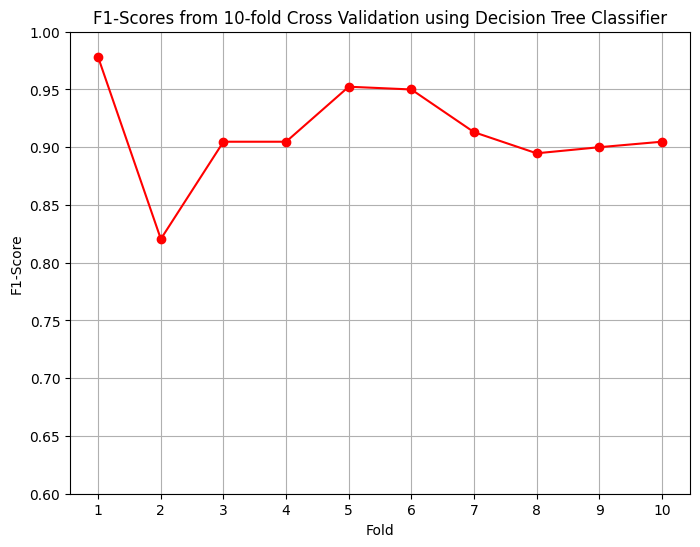

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), f1_scores,color = 'red', marker='o', linestyle='-')
plt.title('F1-Scores from 10-fold Cross Validation using Decision Tree Classifier')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.xticks(range(1, 11))
plt.ylim(0.6, 1.0)  # Set y-axis limits based on the data
plt.grid(True)
plt.show()

### Naive Bayes Implementation

In [20]:
#Defining the Naive Bayes classifier with fit and predict methods
class NaiveBayes:
    def fit(self, X, y):
        #Finding the num of records and num of features in the dataset
        self.records, self.attr = X.shape
        #Finding the unique number of target values
        self.unique_targets = np.unique(y)
        self.per_target = len(self.unique_targets)
        #Creating variables for mean, variance and priors
        self.m = np.zeros((self.per_target, self.attr))
        self.v = np.zeros((self.per_target, self.attr))
        self.p = np.zeros(self.per_target)      
        for i, c in enumerate(self.unique_targets):
            #Seeing the samples that are equal to a particular target class
            matching_X = X[y == c]
            #Calculating the mean, variance and priors for each sample set
            self.m[i, :] = np.mean(matching_X, axis=0)
            self.v[i, :] = np.var(matching_X, axis=0)
            self.p[i] = matching_X.shape[0] / self.records
    
    #Method to predict the classes
    def predict(self, X):
        #Creating an array to store the predictions
        pred = []
        #For every sample we predict the class
        for x in X:
            #List to store posterior
            post = []

            #For every target value checking for probability of the sample records
            for i, c in enumerate(self.unique_targets):
                #Steps to calculate the probability
                prior = np.log(self.p[i])
                curr_mean = self.m[i]
                curr_var = self.v[i]
                const = 1 / np.sqrt(curr_var * 2 * np.pi)
                probability = np.exp(-0.5 * ((x - curr_mean) ** 2 / curr_var))
                curr_post = np.sum(np.log(const * probability))
                curr_post = curr_post + prior
                post.append(curr_post)
            #Predicting the one with highest probability
            curr_pred = self.unique_targets[np.argmax(post)]
            #Appending each prediction
            pred.append(curr_pred)
        #Returning the predictions for the dataset
        return np.array(pred)

In [21]:
#This is a very basic method to calculate the number of correct predictions by comparing the predicted values with the 
#actual vales and dividing this by the total no. of samples
def accuracy_naive_bayes(y_true, y_pred):
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

In [22]:
#Defining X and y from the dataset by separating the target value and the input values
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']].values
y = data['Diagnosis']
#Split the Input and target dataset into train and test using the split method we defined earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#Declaring a model for Naive Bayes
model2 = NaiveBayes()
#Fitting the model with train datasets
model2.fit(X_train, y_train)
#Predicting the test dataset with the fitted model
predictions2 = model2.predict(X_test)
#Calculating the accuracy of the model
print(f"Model's Accuracy: {accuracy_naive_bayes(y_test, predictions2)}")

Model's Accuracy: 0.9646017699115044


In [23]:
#method to calculate f1 score
def f1_score_naive_bayes(y_true, y_pred):
    tp = 0
    fp = 0
    fn = 0
    #Calculating the True-Positives, False_positives and False-Negatives to calculate the f1 score
    for i in range(len(y_true)):
        flag1 = (y_true.iloc[i] == 1)
        flag2 = (y_pred[i] == 1)
        flag3 = (y_true.iloc[i] == 0)
        flag4 = (y_pred[i] == 0)
        if flag1 and flag2:
            tp += 1
        if flag3 and flag2:
            fp += 1
        if flag1 and flag4:
            fn += 1
    #Calculating the precision and recall
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    #Calculating f1 score from precision and recall
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return f1

In [24]:
#Applying a 10-fold cross validation for the model
nb_f1_scores = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=14)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model2.fit(X_train, y_train)
    
    y_pred = model2.predict(X_test)
    f1 = f1_score_naive_bayes(y_test, y_pred)
    
    nb_f1_scores.append(f1)

nb_f1_scores = np.array(nb_f1_scores)

f1_mean = np.mean(nb_f1_scores)
f1_std = np.std(nb_f1_scores)
print("F1 scores acheived in 10-fold cross validation:",f1_scores)
print("Average F1 score:", f1_mean)
print("Standard deviation of F1 scores:", f1_std)

F1 scores acheived in 10-fold cross validation: [0.97777778 0.82051282 0.9047619  0.9047619  0.95238095 0.95
 0.91304348 0.89473684 0.9        0.9047619 ]
Average F1 score: 0.9083966840823976
Standard deviation of F1 scores: 0.03801241879649017


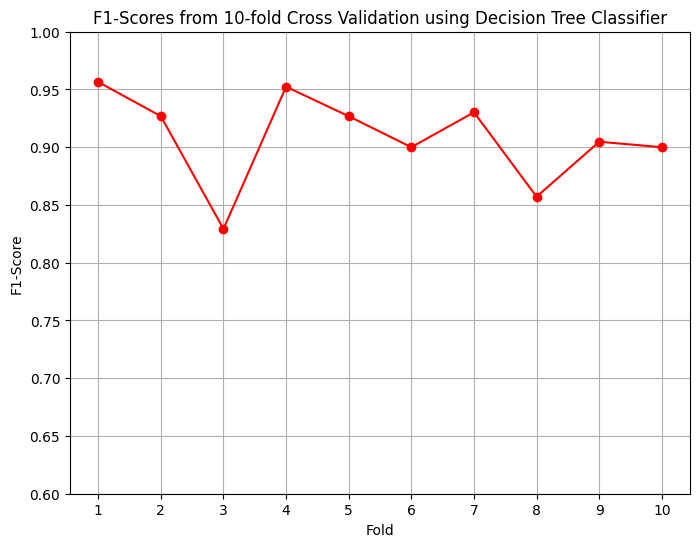

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), nb_f1_scores,color = 'red', marker='o', linestyle='-')
plt.title('F1-Scores from 10-fold Cross Validation using Decision Tree Classifier')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.xticks(range(1, 11))
plt.ylim(0.6, 1.0)  # Set y-axis limits based on the data
plt.grid(True)
plt.show()

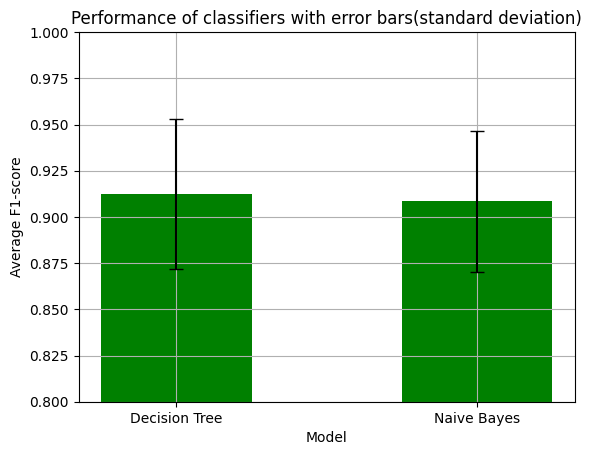

In [26]:
# Plot bar chart with error bars
labels = ['Decision Tree', 'Naive Bayes']
mean_performance = [np.mean(f1_scores), np.mean(nb_f1_scores)]
std_performance = [np.std(f1_scores), np.std(nb_f1_scores)]


plt.bar(labels, mean_performance, yerr=std_performance, capsize=5, width=0.5, color='green')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Average F1-score')
plt.title('Performance of classifiers with error bars(standard deviation)')
plt.grid(True)
plt.ylim(0.8, 1)  # Adjust the y-axis limits if needed
#plt.legend()

# Show plot
plt.show()

### Dimensionality reduction with the Singular Value Decomposition

In [83]:
def svd_decompose(X):
    # Compute the covariance matrix
    cov_matrix = np.dot(X.T, X)
    
    # Perform eigendecomposition on the covariance matrix
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvectors by eigenvalues
    idx = np.argsort(eig_values)[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:, idx]
    
    # Compute the singular values and singular vectors
    singular_values = np.sqrt(eig_values)
    singular_vectors = np.dot(X, eig_vectors) / singular_values
    
    return singular_vectors, singular_values, eig_vectors

In [84]:
#Define a method that will reduce the dataset's dimensions to k factors by applying SVD and calculate the f1 score
#using 10-fold cross validation
def svd_dim_reduce(X, y, k):
    #initialize array to store f1 scores
    f1_scores = []
    feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']
    #declare and define the model
    model = DecisionTreeWithNames(feature_names,1,10)
    #Split the dataset into train and test by 10-fold cross validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=14)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Call SVD method to get the eigen values, sigma values and eigen vectors
        U, S, V = svd_decompose(X_train)
        #reduce them to k dimensions
        UR = U[:, :k]
        SR = np.diag(S[:k])
        VR = V.T[:k, :]
        #prepare the final train by dot product between eigen value and sigma value
        final_x_train = UR @ SR 
        #train the model
        model.fit(final_x_train, y_train)
        #project test dataset
        final_x_test = np.dot(X_test, VR.T)
        #predict with the trained model
        y_pred = model.predict(final_x_test)
        #calculate f1 scores
        f1 = f1_score_decision_tree(y_test, y_pred)
        f1_scores.append(f1)
    f1_scores = np.array(f1_scores)
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    #return f1 mean score and the standard deviation
    return f1_mean, f1_std
#Define input and target dataset
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 
          'concave_points1', 'symmetry1', 'fractal_dimension1', 
          'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 
          'symmetry2', 'fractal_dimension2', 'radius3', 
          'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 
          'fractal_dimension3']].values
y = data['Diagnosis'].values.reshape(-1,1)
svd_f1_scores = []
svd_std_dev = []
#For every value of k as in k dimensions call the method
for k in range(1, X.shape[1]):
    a,b = svd_dim_reduce(X,y, k)
    svd_f1_scores.append(a)
    svd_std_dev.append(b)

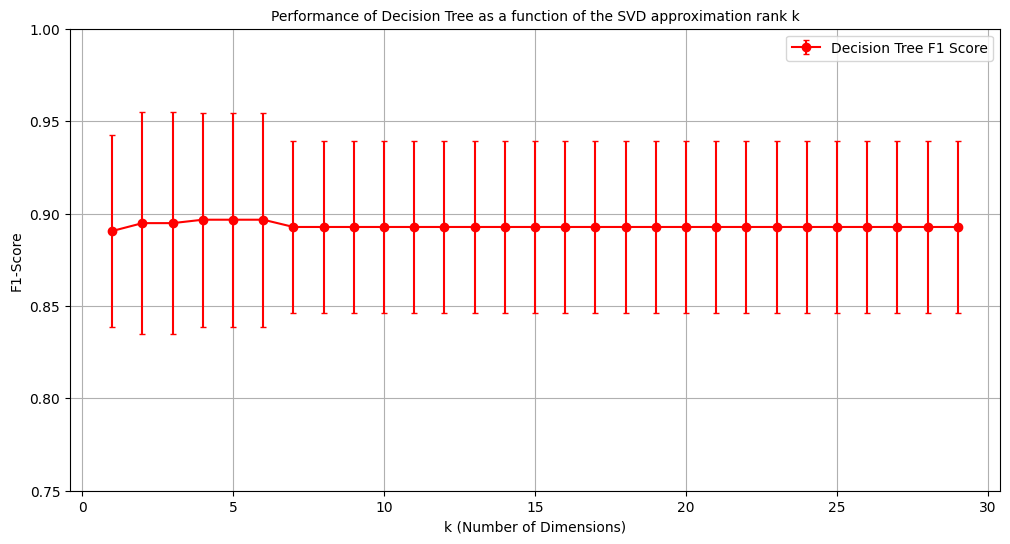

In [85]:
plt.figure(figsize=(12, 6))
plt.errorbar(range(1, 30), svd_f1_scores, yerr=svd_std_dev,color='red', marker='o', capsize=2, label='Decision Tree F1 Score')

# Customize the plot
plt.title('Performance of Decision Tree as a function of the SVD approximation rank k',fontsize = 10)
plt.xlabel('k (Number of Dimensions)')
plt.ylabel('F1-Score')
plt.grid(True)
plt.ylim(0.75, 1)
plt.legend()

# Show plot
plt.show()

In [86]:
#Define a method that will reduce the dataset's dimensions to k factors by applying SVD and calculate the f1 score
#using 10-fold cross validation
def svd_dim_reduce(X, y, k):
    f1_scores = []
    #declare and define the model
    model = NaiveBayes()
    #Split the dataset into train and test by 10-fold cross validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=14)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #Call SVD method to get the eigen values, sigma values and eigen vectors
        U, S, V = svd_decompose(X_train)
        #reduce them to k dimensions
        UR = U[:, :k]
        SR = np.diag(S[:k])
        VR = V.T[:k, :]
        #prepare the final train by dot product between eigen value and sigma value
        final_x_train = UR @ SR 
        #train the model
        model.fit(final_x_train, y_train)
        #project test dataset
        final_x_test = np.dot(X_test, VR.T)
        #predict with the trained model
        y_pred = model.predict(final_x_test)
        #calculate f1 scores
        f1 = f1_score_naive_bayes(y_test, y_pred)
        f1_scores.append(f1)
    f1_scores = np.array(f1_scores)
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    #return f1 mean score and the standard deviation
    return f1_mean,f1_std
#Define input and target dataset
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 
          'concave_points1', 'symmetry1', 'fractal_dimension1', 
          'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 
          'symmetry2', 'fractal_dimension2', 'radius3', 
          'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 
          'fractal_dimension3']].values
y = data['Diagnosis']
svd_f1_scores = []
svd_std_dev = []
#For every value of k as in k dimensions call the method
for k in range(1, X.shape[1]):
    a,b = svd_dim_reduce(X,y, k)
    svd_f1_scores.append(a)
    svd_std_dev.append(b)


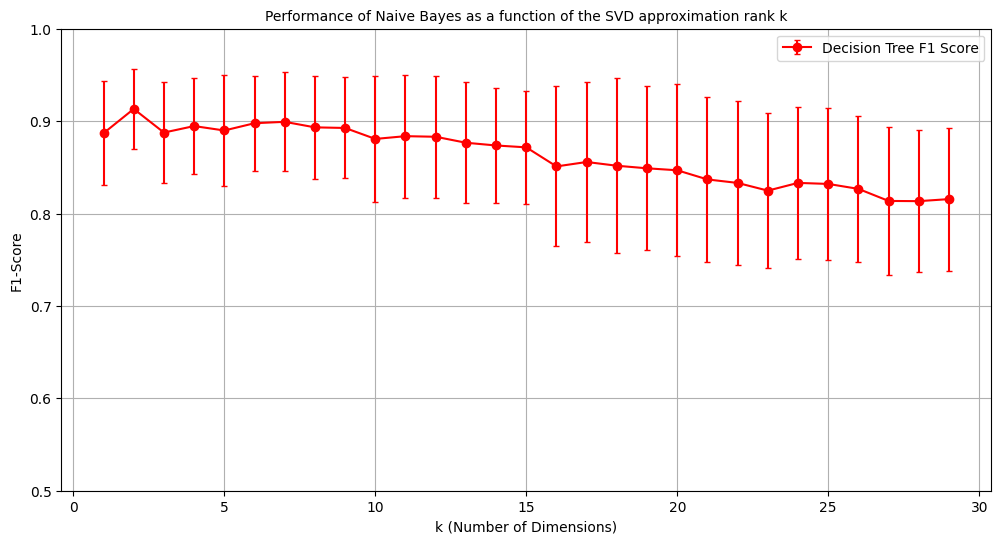

In [87]:
plt.figure(figsize=(12, 6))
plt.errorbar(range(1, 30), svd_f1_scores, yerr=svd_std_dev,color='red', marker='o', capsize=2, label='Decision Tree F1 Score')

# Customize the plot
plt.title('Performance of Naive Bayes as a function of the SVD approximation rank k',fontsize = 10)
plt.xlabel('k (Number of Dimensions)')
plt.ylabel('F1-Score')
plt.grid(True)
plt.ylim(0.5, 1)
plt.legend()

# Show plot
plt.show()

### Feature Selection

### Feature Selection with Navie Bayes

In [60]:
#Defining X and y from the dataset by separating the target value and the input values
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 
          'concave_points1', 'symmetry1', 'fractal_dimension1', 
          'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 
          'symmetry2', 'fractal_dimension2', 'radius3', 
          'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 
          'fractal_dimension3']].values
y = data['Diagnosis']
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.8)
#Creating copies of the original train and test datasets
X_test_og = X_test.copy()
y_test_og = y_test.copy()
fs_Xtrain = X_train.copy()
fs_ytrain = y_train.copy()
#Defining a method to randomize a particular feature in the dataset
def randomize_feature(xtrain, feature):
    #Creating a train dataset copy and with the input feature applying the random functioin with values between 1 and 0
    xtraincopy = xtrain.copy()
    xtraincopy[:, feature] = np.random.uniform(0, 1, xtrain.shape[0])
    #returning the x_train with the given feature values randomized
    return xtraincopy
    
#Defining a method that will take the X_train and return a list of X_train datasets with n number of copies
#where n is equal to the number of features and each copy has one feature with random values
def X_train_new(X_train):
    #Getting all the features indices into a variable
    num_features = X_train.shape[1]
    #List to store the randomized datasets
    Xtrain_variations = []
    #Picking one feature each time and calling the "randomize_feature" method
    for i in range(num_features):
        Xtrain_variations.append(randomize_feature(X_train, i))
    return Xtrain_variations

#Creating variations by calling the random generator method
x_variations = X_train_new(X_train)
#declaring and defining the model
model = NaiveBayes()
f1_scores = []
#Applying a 10-fold cross validation for the model with the 80% data to compare accuracies with all features and top 10 features
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
for train_index, test_index in skf.split(X_test_og, y_test_og):
    X_train, X_test = X_test_og[train_index], X_test_og[test_index]
    y_train, y_test = y_test_og.iloc[train_index], y_test_og.iloc[test_index]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score_naive_bayes(y_test, y_pred)
    
    f1_scores.append(f1)

f1_scores = np.array(f1_scores)

f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print("Average F1 score:", f1_mean)
print("Standard deviation of F1 scores:", f1_std)

Average F1 score: 0.9104323628872963
Standard deviation of F1 scores: 0.03781006345264602


In [61]:
#declaring and defining the model
model = NaiveBayes()
final_f1_score_diff = []
f1_scores = []
#Applying a 5-fold cross validation for the model with the 20% of the original data withot any randomizations
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=18)
for train_index, test_index in skf.split(fs_Xtrain, fs_ytrain):
    X_train, X_test = fs_Xtrain[train_index], fs_Xtrain[test_index]
    y_train, y_test = fs_ytrain.iloc[train_index], fs_ytrain.iloc[test_index]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score_naive_bayes(y_test, y_pred)
    
    f1_scores.append(f1)

f1_scores = np.array(f1_scores)

f1_mean = np.mean(f1_scores)
og = f1_mean
#Now in aloop applying a 5-fold cross validation for the model with the 20% of the once foe every dataset with one of the feature randomized
#Storing the diefference in the f1 sore with the original and randomized dataset
for i in range(30):
    f1_scores = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)
    for train_index, test_index in skf.split(x_variations[i], fs_ytrain):
        X_train, X_test = x_variations[i][train_index], x_variations[i][test_index]
        y_train, y_test = fs_ytrain.iloc[train_index], fs_ytrain.iloc[test_index]
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        f1 = f1_score_naive_bayes(y_test, y_pred)
        
        f1_scores.append(f1)
    
    f1_scores = np.array(f1_scores)
    
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    final_f1_score_diff.append(og-f1_mean)
print(final_f1_score_diff)

[0.0016666666666668162, 0.0016666666666668162, 0.0016666666666668162, 0.0016666666666668162, 0.0016666666666668162, -0.009761904761904638, -0.009761904761904638, -0.009761904761904638, 0.0016666666666668162, 0.0016666666666668162, -0.009761904761904638, 0.0016666666666668162, -0.009761904761904638, -0.009761904761904638, 0.0016666666666668162, -0.009761904761904638, -0.009761904761904638, -0.009761904761904638, -0.009761904761904638, 0.0016666666666668162, 0.0016666666666668162, 0.0016666666666668162, 0.0016666666666668162, 0.015000000000000013, 0.0016666666666668162, 0.0016666666666668162, 0.0016666666666668162, 0.0016666666666668162, 0.017051282051282146, 0.0016666666666668162]


In [62]:
#Creaxing a dictionary with the feature name and f1 score difference value appended
feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']

col_dict = {}
for i in range(30):
    col_dict[i] = [feature_names[i],final_f1_score_diff[i]]

#Sorting the dictionary to find out the top 10 features whose value randomized caused the huge difference in f1 scores
sorted_dict = dict(sorted(col_dict.items(), key=lambda x: -x[1][1]))

print(sorted_dict)


{28: ['symmetry3', 0.017051282051282146], 23: ['area3', 0.015000000000000013], 0: ['radius1', 0.0016666666666668162], 1: ['texture1', 0.0016666666666668162], 2: ['perimeter1', 0.0016666666666668162], 3: ['area1', 0.0016666666666668162], 4: ['smoothness1', 0.0016666666666668162], 8: ['symmetry1', 0.0016666666666668162], 9: ['fractal_dimension1', 0.0016666666666668162], 11: ['texture2', 0.0016666666666668162], 14: ['smoothness2', 0.0016666666666668162], 19: ['fractal_dimension2', 0.0016666666666668162], 20: ['radius3', 0.0016666666666668162], 21: ['texture3', 0.0016666666666668162], 22: ['perimeter3', 0.0016666666666668162], 24: ['smoothness3', 0.0016666666666668162], 25: ['compactness3', 0.0016666666666668162], 26: ['concavity3', 0.0016666666666668162], 27: ['concave_points3', 0.0016666666666668162], 29: ['fractal_dimension3', 0.0016666666666668162], 5: ['compactness1', -0.009761904761904638], 6: ['concavity1', -0.009761904761904638], 7: ['concave_points1', -0.009761904761904638], 10: [

In [63]:
new_features = []
columns_to_drop = []
counter = 0
#Selecting the top 10 features and finding the indices of the features that shall be dropped
for i in sorted_dict:
    if counter == 17:
        break
    new_features.append(sorted_dict[i][0])
    counter += 1
#Based on the indices dropping all the columns from the original 80%dataset to train and test the model
for i in range(30):
    if feature_names[i] not in new_features:
        columns_to_drop.append(i)
print(columns_to_drop)
print(new_features)

[5, 6, 7, 10, 12, 13, 15, 16, 17, 18, 26, 27, 29]
['symmetry3', 'area3', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'symmetry1', 'fractal_dimension1', 'texture2', 'smoothness2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'smoothness3', 'compactness3']


In [64]:
#Defined a feature names which is an input to my "DecisionTreeWithNames" class to print the tree
scores_dt = []
std_dt = []
for column_index in sorted(columns_to_drop, reverse=True):
    X_test_og = np.delete(X_test_og, column_index, axis=1)
for j in range(1,11):
    temp_set = X_test_og[:,:j]
    print(new_features)
    #declaring and defining the model
    model = NaiveBayes()
    f1_scores = []
    #Applying a 10-fold cross validation for the model
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=9)
    for train_index, test_index in skf.split(temp_set, y_test_og):
        X_train, X_test = temp_set[train_index], temp_set[test_index]
        y_train, y_test = y_test_og.iloc[train_index], y_test_og.iloc[test_index]
        #fitting the model i.e., training the model
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        f1 = f1_score_naive_bayes(y_test, y_pred)
        
        f1_scores.append(f1)
    
    f1_scores = np.array(f1_scores)
    
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    scores_dt.append(f1_mean)
    std_dt.append(f1_std)

['symmetry3', 'area3', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'symmetry1', 'fractal_dimension1', 'texture2', 'smoothness2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'smoothness3', 'compactness3']
['symmetry3', 'area3', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'symmetry1', 'fractal_dimension1', 'texture2', 'smoothness2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'smoothness3', 'compactness3']
['symmetry3', 'area3', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'symmetry1', 'fractal_dimension1', 'texture2', 'smoothness2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'smoothness3', 'compactness3']
['symmetry3', 'area3', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'symmetry1', 'fractal_dimension1', 'texture2', 'smoothness2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'smoothness3', 'compactness3']
['symmetry3', 'area3', 'radius1', 'texture1', 'perimeter

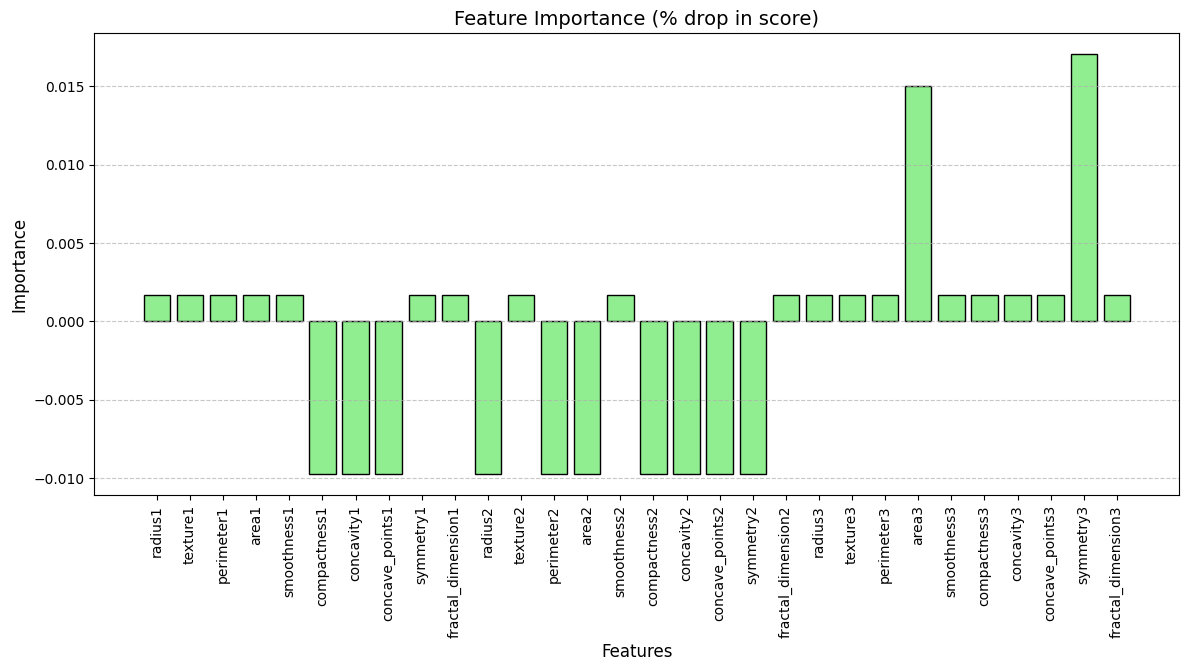

In [65]:
plt.figure(figsize=(14, 6))
bars = plt.bar(range(1, len(final_f1_score_diff) + 1), final_f1_score_diff, color='lightgreen', edgecolor='black')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance (% drop in score)', fontsize=14)
plt.xticks(range(1, len(feature_names) + 1), [feature_names[i] for i in range(0, len(feature_names))], rotation=90, fontsize=10)
plt.yticks(fontsize=10)
#plt.gca().invert_xaxis()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

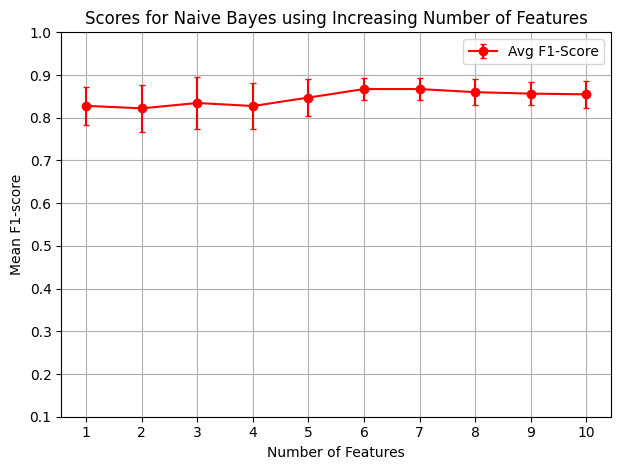

In [68]:
num_features = [i for i in range(1,11)]
plt.errorbar(num_features, scores_dt, yerr=std_dt, marker='o', color='red', capsize=2, linestyle='-', linewidth=1.5, markersize=6, label='Avg F1-Score')
plt.title('Scores for Naive Bayes using Increasing Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean F1-score')
plt.xticks(num_features)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(0.1, 1.0) 
plt.show()

### Feature Selection with Decision Tree

In [77]:
#Defining X and y from the dataset by separating the target value and the input values
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 
          'concave_points1', 'symmetry1', 'fractal_dimension1', 
          'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 
          'symmetry2', 'fractal_dimension2', 'radius3', 
          'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 
          'fractal_dimension3']].values
y = data['Diagnosis'].values.reshape(-1,1)
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8)
#Creating copies of the original train and test datasets
X_test_og = X_test.copy()
y_test_og = y_test.copy()
fs_Xtrain = X_train.copy()
fs_ytrain = y_train.copy()
#Defining a method to randomize a particular feature in the dataset
def randomize_feature(xtrain, feature):
    #Creating a train dataset copy and with the input feature applying the random functioin with values between 1 and 0
    xtraincopy = xtrain.copy()
    xtraincopy[:, feature] = np.random.uniform(0, 1, xtrain.shape[0])
    #returning the x_train with the given feature values randomized
    return xtraincopy
    
#Defining a method that will take the X_train and return a list of X_train datasets with n number of copies
#where n is equal to the number of features and each copy has one feature with random values
def X_train_new(X_train):
    #Getting all the features indices into a variable
    num_features = X_train.shape[1]
    #List to store the randomized datasets
    Xtrain_variations = []
    #Picking one feature each time and calling the "randomize_feature" method
    for i in range(num_features):
        Xtrain_variations.append(randomize_feature(X_train, i))
    return Xtrain_variations

#Defined a feature names which is an input to my "DecisionTreeWithNames" class to print the tree
feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']
#Creating variations by calling the random generator method
x_variations = X_train_new(X_train)
#declaring and defining the model
model = DecisionTreeWithNames(feature_names,1,12)
f1_scores = []
#Applying a 10-fold cross validation for the model with the 80% data to compare accuracies with all features and top 10 features
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=18)
for train_index, test_index in skf.split(X_test_og, y_test_og):
    X_train, X_test = X_test_og[train_index], X_test_og[test_index]
    y_train, y_test = y_test_og[train_index], y_test_og[test_index]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score_decision_tree(y_test, y_pred)
    
    f1_scores.append(f1)

f1_scores = np.array(f1_scores)

f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print("Average F1 score:", f1_mean)
print("Standard deviation of F1 scores:", f1_std)

Average F1 score: 0.8933033555295864
Standard deviation of F1 scores: 0.054134979956306783


In [78]:
#Defined a feature names which is an input to my "DecisionTreeWithNames" class to print the tree
feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']
#declaring and defining the model
model = DecisionTreeWithNames(feature_names,1,10)
final_f1_score_diff = []
f1_scores = []
#Applying a 5-fold cross validation for the model with the 20% of the original data withot any randomizations
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
for train_index, test_index in skf.split(fs_Xtrain, fs_ytrain):
    X_train, X_test = fs_Xtrain[train_index], fs_Xtrain[test_index]
    y_train, y_test = fs_ytrain[train_index], fs_ytrain[test_index]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score_decision_tree(y_test, y_pred)
    
    f1_scores.append(f1)

f1_scores = np.array(f1_scores)

f1_mean = np.mean(f1_scores)
og = f1_mean
#Now in aloop applying a 5-fold cross validation for the model with the 20% of the once foe every dataset with one of the feature randomized
#Storing the diefference in the f1 sore with the original and randomized dataset
for i in range(30):
    f1_scores = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)
    for train_index, test_index in skf.split(x_variations[i], fs_ytrain):
        X_train, X_test = x_variations[i][train_index], x_variations[i][test_index]
        y_train, y_test = fs_ytrain[train_index], fs_ytrain[test_index]
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        f1 = f1_score_decision_tree(y_test, y_pred)
        
        f1_scores.append(f1)
    
    f1_scores = np.array(f1_scores)
    
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    final_f1_score_diff.append(og-f1_mean)
print(final_f1_score_diff)

[0.033624011007912125, 0.03500000000000014, 0.033624011007912125, 0.033624011007912125, 0.07054708793098907, 0.043147820531721615, 0.033624011007912125, 0.04520295837633326, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.033624011007912125, 0.04362401100791202, 0.033624011007912125, 0.026243058626959637, 0.029987647371548354, 0.04415032679738573, 0.033624011007912125, 0.033624011007912125, 0.02776542514932634, 0.04632242370632478, 0.033624011007912125, 0.033624011007912125]


In [79]:
#Creaxing a dictionary with the feature name and f1 score difference value appended
feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']

col_dict = {}
for i in range(30):
    col_dict[i] = [feature_names[i],final_f1_score_diff[i]]

#Sorting the dictionary to find out the top 10 features whose value randomized caused the huge difference in f1 scores
sorted_dict = dict(sorted(col_dict.items(), key=lambda x: -x[1][1]))

print(sorted_dict)


{4: ['smoothness1', 0.07054708793098907], 27: ['concave_points3', 0.04632242370632478], 7: ['concave_points1', 0.04520295837633326], 23: ['area3', 0.04415032679738573], 19: ['fractal_dimension2', 0.04362401100791202], 5: ['compactness1', 0.043147820531721615], 1: ['texture1', 0.03500000000000014], 0: ['radius1', 0.033624011007912125], 2: ['perimeter1', 0.033624011007912125], 3: ['area1', 0.033624011007912125], 6: ['concavity1', 0.033624011007912125], 8: ['symmetry1', 0.033624011007912125], 9: ['fractal_dimension1', 0.033624011007912125], 10: ['radius2', 0.033624011007912125], 11: ['texture2', 0.033624011007912125], 12: ['perimeter2', 0.033624011007912125], 13: ['area2', 0.033624011007912125], 14: ['smoothness2', 0.033624011007912125], 15: ['compactness2', 0.033624011007912125], 16: ['concavity2', 0.033624011007912125], 17: ['concave_points2', 0.033624011007912125], 18: ['symmetry2', 0.033624011007912125], 20: ['radius3', 0.033624011007912125], 24: ['smoothness3', 0.033624011007912125],

In [80]:
new_features = []
columns_to_drop = []
counter = 0
#Selecting the top 10 features and finding the indices of the features that shall be dropped
for i in sorted_dict:
    if counter == 10:
        break
    new_features.append(sorted_dict[i][0])
    counter += 1
#Based on the indices dropping all the columns from the original 80%dataset to train and test the model
for i in range(30):
    if feature_names[i] not in new_features:
        columns_to_drop.append(i)
print(columns_to_drop)
print(new_features)

[6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29]
['smoothness1', 'concave_points3', 'concave_points1', 'area3', 'fractal_dimension2', 'compactness1', 'texture1', 'radius1', 'perimeter1', 'area1']


In [81]:
scores_dt = []
std_dt = []
for column_index in sorted(columns_to_drop, reverse=True):
    X_test_og = np.delete(X_test_og, column_index, axis=1)
for j in range(1,11):
    temp_set = X_test_og[:,:j]
#declaring and defining the model
    model = DecisionTreeWithNames(new_features,1,10)
    f1_scores = []
    standard_dev = []
    #Applying a 10-fold cross validation for the model
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=18)
    for train_index, test_index in skf.split(temp_set, y_test_og):
        X_train, X_test = temp_set[train_index], temp_set[test_index]
        y_train, y_test = y_test_og[train_index], y_test_og[test_index]
        #fitting the model i.e., training the model
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        f1 = f1_score_decision_tree(y_test, y_pred)
        
        f1_scores.append(f1)
    
    f1_scores = np.array(f1_scores)
    
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    scores_dt.append(f1_mean)
    std_dt.append(f1_std)

In [415]:
#Printing the generated tree
model.print_tree()

concavity1 <= 0.3 and 0.542206222659535
  True:
  concave_points1 <= 0.4 and 0.14452879528531964
    True:
    compactness1 <= 0 and 0.02878225654794532
      True:
      Predicted class: 1.0
      False:
      Predicted class: 0.0
    False:
    smoothness1 <= 0.2 and 0.16414425502581054
      True:
      Predicted class: 0.0
      False:
      Predicted class: 0.0
  False:
  concave_points1 <= 0.5 and 0.23306989755679774
    True:
    perimeter3 <= 0.3 and 0.42746437072547616
      True:
      Predicted class: 0.0
      False:
      Predicted class: 1.0
    False:
    Predicted class: 1.0


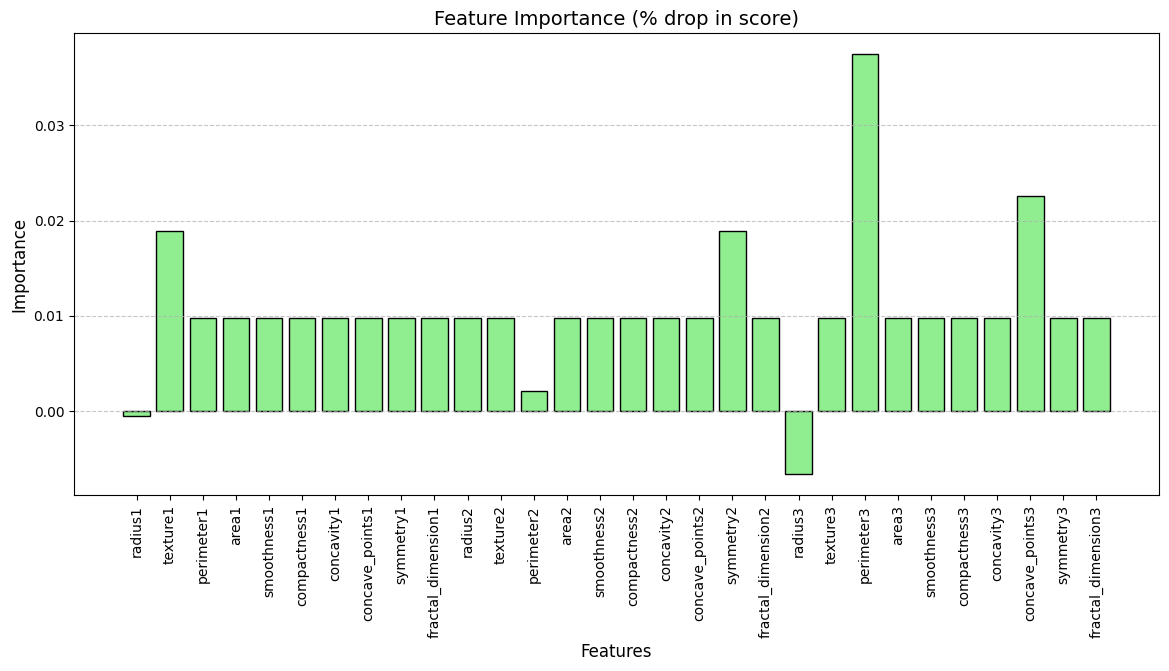

In [416]:
plt.figure(figsize=(14, 6))
bars = plt.bar(range(1, len(final_f1_score_diff) + 1), final_f1_score_diff, color='lightgreen', edgecolor='black')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance (% drop in score)', fontsize=14)
plt.xticks(range(1, len(feature_names) + 1), [feature_names[i] for i in range(0, len(feature_names))], rotation=90, fontsize=10)
plt.yticks(fontsize=10)
#plt.gca().invert_xaxis()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

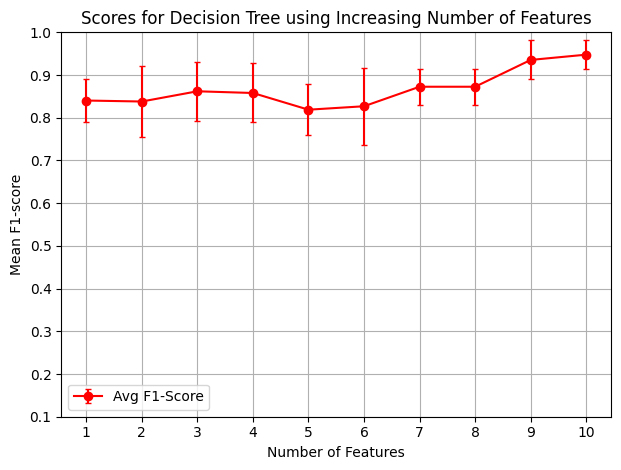

In [82]:
num_features = [i for i in range(1,11)]
plt.errorbar(num_features, scores_dt, yerr=std_dt, marker='o', color='red', capsize=2, linestyle='-', linewidth=1.5, markersize=6, label='Avg F1-Score')
plt.title('Scores for Decision Tree using Increasing Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean F1-score')
plt.xticks(num_features)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(0.1, 1.0) 
plt.show()

# Data Augmentation : SMOTE

In [88]:
#Defining a method to apply SMOTE for data augmentation for Decision tree
def SMOTE_decision_tree(X, y, N, k):
    #Checking the minority class by finding the target values count
    class1 = np.where(y.flatten() == 1)[0]
    class2 = np.where(y.flatten() == 0)[0]
    #Based on the counts assigning the majority and minority class
    if len(class1) < len(class2):
        minority_indices = class1
        majority_indices = class2
    else:
        minority_indices = class2
        majority_indices = class1
    X_extended = []
    y_extended = []
    #Getting the samples with target values for that of the minority class
    for i in range(len(minority_indices)):
        #for every sample of the minority class
        x = X[minority_indices[i]]
        temp = []
        #Calculating the nearest neighbors
        for x_near in X:
            dis = np.sqrt(np.sum((x - x_near) ** 2))
            temp.append(dis)
        neighbours = np.argsort(temp)[1:k+1]
        #For every record creating copies or augmented data based on the neighbors values and inputs for percentage of replication
        for j in range(N):
            #Randomly picking a neighbor
            neighbour_index = np.random.choice(neighbours)
            #finding difference between the neighbor and the actual sample value
            diff = X[neighbour_index] - x
            dis = np.random.random()
            #generating copies based on a random distance from the neighbor picked
            new_val = x + dis * diff
            X_extended.append(new_val)
            y_extended.append(y[minority_indices[i]])
        #Adding the augmented and real X and y values for minority class
        X_extended.append(x)
        y_extended.append(y[minority_indices[i]])
    for i in range(len(majority_indices)):
        #Appending the majority samples and respective sample values
        X_extended.append(X[majority_indices[i]])
        y_extended.append(y[majority_indices[i]])
    return np.array(X_extended), np.array(y_extended)
#Defining X and y from the dataset by separating the target value and the input values
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 
          'concave_points1', 'symmetry1', 'fractal_dimension1', 
          'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 
          'symmetry2', 'fractal_dimension2', 'radius3', 
          'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 
          'fractal_dimension3']].values
y = data['Diagnosis'].values.reshape(-1,1)
#Split the Input and target dataset into train and test using the split method we defined earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18, test_size=0.2)
#For k = 1 and k = 5 creating augmented data with replication factor 1 (100%), 2 (200%) and 3 (300%)
augmented_X_k1_100, augmented_y_k1_100 = SMOTE_decision_tree(X_train, y_train, N=1, k=1)
augmented_X_k1_200, augmented_y_k1_200 = SMOTE_decision_tree(X_train, y_train, N=2, k=1)
augmented_X_k1_300, augmented_y_k1_300 = SMOTE_decision_tree(X_train, y_train, N=3, k=1)
augmented_X_k5_100, augmented_y_k5_100 = SMOTE_decision_tree(X_train, y_train, N=1, k=5)
augmented_X_k5_200, augmented_y_k5_200 = SMOTE_decision_tree(X_train, y_train, N=2, k=5)
augmented_X_k5_300, augmented_y_k5_300 = SMOTE_decision_tree(X_train, y_train, N=3, k=5)

In [89]:
#Defined a feature names which is an input to my "DecisionTreeWithNames" class to print the tree
feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']
#declaring and defining the model
model = DecisionTreeWithNames(feature_names,5,6)
#Creating a list of all the augmented datasets to perform a train and test on each augmented data and calculating the f1-score
x_trains_list = [augmented_X_k1_100, 
augmented_X_k1_200, 
augmented_X_k1_300, 
augmented_X_k5_100, 
augmented_X_k5_200, 
augmented_X_k5_300 ]
y_trains_list = [ augmented_y_k1_100 , augmented_y_k1_200, augmented_y_k1_300 , 
                 augmented_y_k5_100, augmented_y_k5_200, augmented_y_k5_300 ]
final_f1_scores_decision_tree = []
for i in range(6):
    X_train, X_test = x_trains_list[i], X_test
    y_train, y_test = y_trains_list[i], y_test
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    f1 = f1_score_decision_tree(y_test, y_pred)
    
    final_f1_scores_decision_tree.append(f1)
print(final_f1_scores_decision_tree)

[0.8775510204081632, 0.8627450980392156, 0.8775510204081632, 0.888888888888889, 0.8627450980392156, 0.8571428571428572]


In [90]:
#Defining a method to apply SMOTE for data augmentation for Naive Bayes
def SMOTE_naive_bayes(X, y, N, k):
    #Checking the minority class by finding the target values count
    class1 = np.where(y == 1)[0]
    class2 = np.where(y == 0)[0]
    #Based on the counts assigning the majority and minority class
    if len(class1) < len(class2):
        minority_indices = class1
        majority_indices = class2
    else:
        minority_indices = class2
        majority_indices = class1
    X_extended = []
    y_extended = []
    #Getting the samples with target values for that of the minority class
    for i in range(len(minority_indices)):
        #for every sample of the minority class
        x = X[minority_indices[i]]
        temp = []
        #Calculating the nearest neighbors
        for x_near in X:
            dis = np.sqrt(np.sum((x - x_near) ** 2))
            temp.append(dis)
        neighbours = np.argsort(temp)[1:k+1]
        #For every record creating copies or augmented data based on the neighbors values and inputs for percentage of replication
        for j in range(N):
            #Randomly picking a neighbor
            neighbour_index = np.random.choice(neighbours)
            #finding difference between the neighbor and the actual sample value
            diff = X[neighbour_index] - x
            dis = np.random.random()
            #generating copies based on a random distance from the neighbor picked
            new_val = x + dis * diff
            X_extended.append(new_val)
            y_extended.append(y.iloc[minority_indices[i]])
        #Adding the augmented and real X and y values for minority class
        X_extended.append(x)
        y_extended.append(y.iloc[minority_indices[i]])
    for i in range(len(majority_indices)):
        #Appending the majority samples and respective sample values
        X_extended.append(X[majority_indices[i]])
        y_extended.append(y.iloc[majority_indices[i]])
    return np.array(X_extended), np.array(y_extended)
#Defining X and y from the dataset by separating the target value and the input values
X = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
        'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 
        'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 
        'concave_points3', 'symmetry3', 'fractal_dimension3']].values
y = data['Diagnosis']
#Split the Input and target dataset into train and test using the split method we defined earlier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18, test_size=0.2)
#For k = 1 and k = 5 creating augmented data with replication factor 1 (100%), 2 (200%) and 3 (300%)
augmented_X_k1_100, augmented_y_k1_100 = SMOTE_naive_bayes(X_train, y_train, N=1, k=1)
augmented_X_k1_200, augmented_y_k1_200 = SMOTE_naive_bayes(X_train, y_train, N=2, k=1)
augmented_X_k1_300, augmented_y_k1_300 = SMOTE_naive_bayes(X_train, y_train, N=3, k=1)
augmented_X_k5_100, augmented_y_k5_100 = SMOTE_naive_bayes(X_train, y_train, N=1, k=5)
augmented_X_k5_200, augmented_y_k5_200 = SMOTE_naive_bayes(X_train, y_train, N=2, k=5)
augmented_X_k5_300, augmented_y_k5_300 = SMOTE_naive_bayes(X_train, y_train, N=3, k=5)

In [91]:
#declaring and defining the model
model_2 = NaiveBayes()
#Creating a list of all the augmented datasets to perform a train and test on each augmented data and calculating the f1-score
x_trains_list = [augmented_X_k1_100, 
augmented_X_k1_200, 
augmented_X_k1_300, 
augmented_X_k5_100, 
augmented_X_k5_200, 
augmented_X_k5_300 ]
y_trains_list = [ augmented_y_k1_100 , augmented_y_k1_200, augmented_y_k1_300 , 
                 augmented_y_k5_100, augmented_y_k5_200, augmented_y_k5_300 ]
final_f1_scores_naive_bayes = []
for i in range(6):
    X_train, X_test = x_trains_list[i], X_test
    y_train, y_test = y_trains_list[i], y_test
    model_2.fit(X_train, y_train)
    
    y_pred = model_2.predict(X_test)
    f1 = f1_score_naive_bayes(y_test, y_pred)
    
    final_f1_scores_naive_bayes.append(f1)
print(final_f1_scores_naive_bayes)

[0.9148936170212766, 0.9263157894736843, 0.9263157894736843, 0.9148936170212766, 0.9361702127659574, 0.9263157894736843]


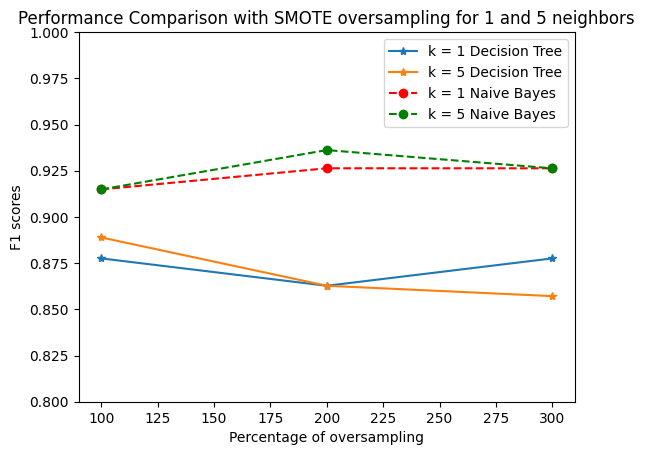

In [92]:
#Picking the values for all replication factors and all the neighbors for plotting
k1_nb = final_f1_scores_naive_bayes[:3]
k5_nb = final_f1_scores_naive_bayes[3:]
k1_dt = final_f1_scores_decision_tree[:3]
k5_dt = final_f1_scores_decision_tree[3:]
perc = [100, 200, 300]

plt.plot(perc, k1_dt, marker='*', label='k = 1 Decision Tree')
plt.plot(perc, k5_dt, marker='*', label='k = 5 Decision Tree')
plt.plot(perc, k1_nb, marker='o', label='k = 1 Naive Bayes', color='red', linestyle='--')
plt.plot(perc, k5_nb, marker='o', label='k = 5 Naive Bayes', color='green', linestyle='--')

plt.xlabel('Percentage of oversampling')
plt.ylabel('F1 scores')
plt.title('Performance Comparison with SMOTE oversampling for 1 and 5 neighbors')
plt.ylim(0.8, 1)
plt.legend()
plt.show()